In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import RandomizedSearchCV

df= pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [260]:
df.shape

(301, 9)

In [261]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [262]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [263]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [264]:
df.columns
car_data= df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
car_data['age']=2020-car_data['Year']
car_data.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [265]:
car_data.drop('Year',1,inplace=True)
car_data.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [266]:
car_data.dtypes


Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
age                int64
dtype: object

In [267]:
# plt.hist(df['Fuel_Type'].value_counts())


In [268]:
car_data = pd.get_dummies(car_data,drop_first=True)

In [269]:
car_data.head(3)


,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


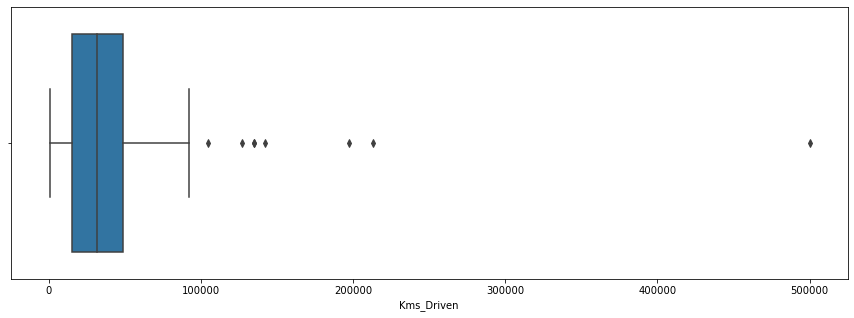

In [270]:
plt.figure(figsize=(15,5))
plt.plot(car_data['Kms_Driven'])

sns.boxplot(car_data['Kms_Driven'],orient='h')

In [271]:
# car_data[car_data['Kms_Driven']<14].shape

### Outlier Treatment (can be achieved either by IQR method --- or --- z-score)


In [272]:
# import scipy
# z_scores = scipy.stats.zscore(car_data)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = car_data[filtered_entries]


car_data['Kms_Driven']=car_data['Kms_Driven'].astype(float)
car_data['age']=car_data['age'].astype(float)


def outlier_treat(df):
    for i in df.columns: 
        if df[i].dtype == int or df[i].dtype == float:
            q1, q3 = np.percentile(df[i],[25,75]) 
            iqr = q3 - q1 
            lower = q1 - (1.5 * iqr) 
            upper = q3 + (1.5 * iqr) 
            df[i] = df[i].apply(lambda x : lower if x < lower 
                          else upper if x > upper else x)
            
    return df    

outlier_treat(car_data)

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,6.0,0,1,0,1
1,4.75,9.54,43000.0,0,7.0,1,0,0,1
2,7.25,9.85,6900.0,0,3.0,0,1,0,1
3,2.85,4.15,5200.0,0,9.0,0,1,0,1
4,4.60,6.87,42450.0,0,6.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988.0,0,4.0,1,0,0,1
297,4.00,5.90,60000.0,0,5.0,0,1,0,1
298,3.35,11.00,87934.0,0,11.0,0,1,0,1
299,11.50,12.50,9000.0,0,3.0,1,0,0,1


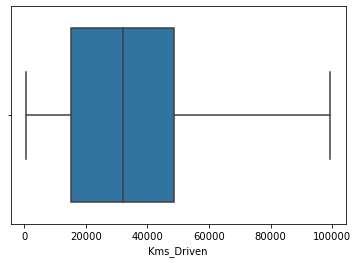

In [273]:

sns.boxplot(car_data['Kms_Driven'],orient='h')

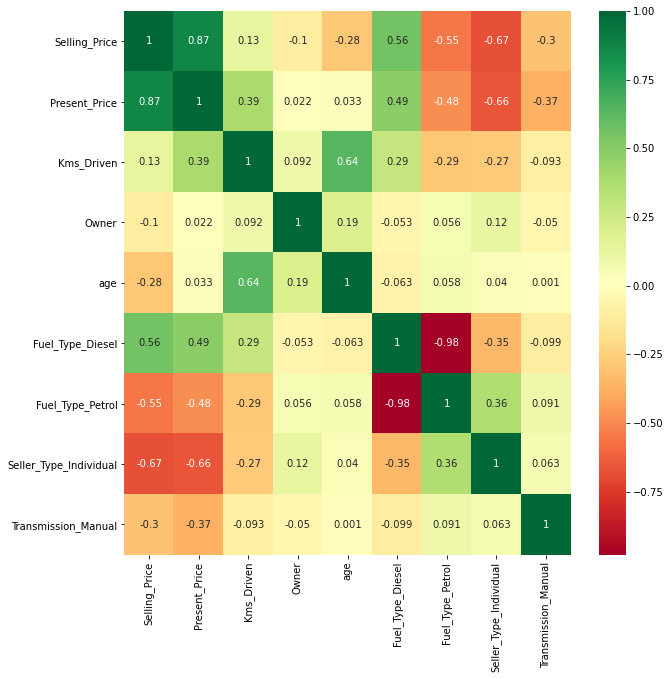

In [274]:
features = car_data.columns

plt.figure(figsize=(10,10))
sns.heatmap(car_data[features].corr(),annot=True,cmap='RdYlGn')

# sns.pairplot(car_data)


In [275]:
#scaling/standardizing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# min_max_scaler = MinMaxScaler()
# scaler = MinMaxScaler()
# scaler1 = StandardScaler()
# car_data['Kms_Driven'] = min_max_scaler.fit_transform(car_data['Kms_Driven'])

# car_data['Kms_Driven'] = car_data['Kms_Driven'].apply(
#                            lambda x: StandardScaler().fit_transform(x))
# car_data['Kms_Driven']

# car_data[['Present_Price','Kms_Driven','age']] = scaler.fit_transform(car_data[['Present_Price','Kms_Driven','age']])
car_data

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,6.0,0,1,0,1
1,4.75,9.54,43000.0,0,7.0,1,0,0,1
2,7.25,9.85,6900.0,0,3.0,0,1,0,1
3,2.85,4.15,5200.0,0,9.0,0,1,0,1
4,4.60,6.87,42450.0,0,6.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988.0,0,4.0,1,0,0,1
297,4.00,5.90,60000.0,0,5.0,0,1,0,1
298,3.35,11.00,87934.0,0,11.0,0,1,0,1
299,11.50,12.50,9000.0,0,3.0,1,0,0,1


In [276]:
car_data

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,6.0,0,1,0,1
1,4.75,9.54,43000.0,0,7.0,1,0,0,1
2,7.25,9.85,6900.0,0,3.0,0,1,0,1
3,2.85,4.15,5200.0,0,9.0,0,1,0,1
4,4.60,6.87,42450.0,0,6.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988.0,0,4.0,1,0,0,1
297,4.00,5.90,60000.0,0,5.0,0,1,0,1
298,3.35,11.00,87934.0,0,11.0,0,1,0,1
299,11.50,12.50,9000.0,0,3.0,1,0,0,1


In [277]:
# sns.pairplot(car_data)

In [278]:
X=car_data.iloc[:,1:]
y=car_data.iloc[:,0]
# y.max()



In [279]:
#feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [280]:
model.feature_importances_

feature_importance = pd.Series(model.feature_importances_,index =X.columns)

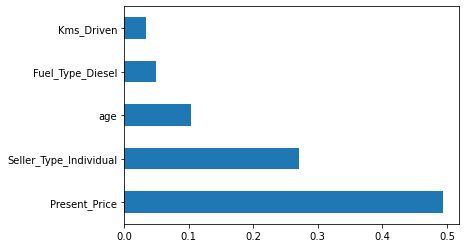

In [281]:
feature_importance.nlargest(5).plot(kind='barh')

In [282]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3)

In [283]:
display(X_train.shape, X_test.shape)

X.shape

(210, 8)

(91, 8)

(301, 8)

In [284]:
from sklearn.ensemble import RandomForestRegressor
rfrandom = RandomForestRegressor()

In [285]:
#hyperparameters 


# print(n_estimators)

In [286]:
#Randomized searchCV

#number of decision trees
n_estimators= [int(x) for x in np.linspace(start=100 , stop=1200 , num=12) ]

#number of features to consider at every split 
max_features = ['auto','sqrt']

#max number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5 , stop=30 , num=6) ]

#minimun number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimun number of samples required to each leaf node
min_samples_leaf = [1,2,5,10]


random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [287]:
#base model to tune

rf =RandomForestRegressor()

In [288]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [289]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [291]:
# rf_random.best_estimator_
rf_random.best_score_

-1.304525194844255

In [292]:
pred = rf_random.predict(X_test)

In [293]:
pred

array([ 0.56186,  9.14707,  4.34545,  3.33735,  0.57147,  1.23582,
        2.71076,  2.81658, 13.27535,  0.49417,  5.1169 ,  1.05494,
        0.52631,  9.77272,  5.59625,  6.37929,  0.53483,  3.99368,
        0.63855,  3.40838,  3.63745,  2.55673,  0.60646,  3.33295,
        4.82954,  3.49866,  5.41698,  0.66793,  0.47466,  3.32228,
        9.915  ,  1.11063,  6.75999,  1.1744 ,  0.64222,  0.86845,
        8.78197,  1.10856,  0.62953,  0.49419,  7.1115 ,  2.92277,
        7.85614,  5.92698,  0.52382,  1.22907,  0.69199,  1.4194 ,
        4.4586 ,  7.11299,  5.96503,  8.48338,  0.37887,  1.0053 ,
       10.74498,  5.31737,  0.83245,  3.99175,  4.75683,  8.31275,
        9.18107,  5.14562,  5.82875,  0.54835,  0.81792,  5.28916,
        4.23954,  4.7266 ,  2.1395 ,  3.7049 ,  5.9296 ,  1.0615 ,
       13.167  ,  7.2554 ,  5.4667 , 10.8416 ,  0.63501,  0.87467,
        6.53116,  0.72485, 12.70249,  8.32669,  8.25375,  3.09745,
        6.6735 ,  0.62597,  0.49142,  5.55155,  2.18563,  0.39

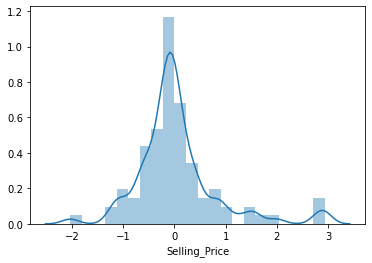

In [294]:
sns.distplot(y_test-pred)
# plt.scatter(y_test,pred)

In [295]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.5159170329670374
MSE: 0.6503621091110046
RMSE: 0.8064503140993898


In [296]:
import pickle

file=open('random_forest_regressor_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)

In [297]:
# model = pickle.load(open('random_forest_regressor_model.pkl', 'rb'))

### Accuracy of car prediction model 

In [298]:
metrics.r2_score(y_test,pred)
# rf_random.cv_results_

0.9558271070803523

In [112]:
# a=np.array([6.87,43000,0,3,0,1,0,1])
# aa=pd.DataFrame(a)

# ad=aa.transpose()
# ad.columns=X_test.columns
# # aa
# ad

In [114]:
# rf_random.predict(ad)
# # aa

# # X_test

In [98]:
# 2017,7.25,9.85,6900,Petrol,Dealer,Manual,0